In [6]:
import numpy as np
import seaborn as sns
from tqdm import trange
from scipy.stats import norm
import matplotlib.pyplot as plt

In [7]:
# plotting params
%matplotlib inline
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = (15.0, 8.0)
sns.set_style("white")

# path params
plot_dir = './plots/'


## Question Prompt

given the following current equation

$$ (\Delta L, \Delta V_{TH})=\frac{50}{0.1+\Delta L}(0.6-\Delta V_{TH})^2$$


* $\Delta L \sim \ N(0,0.01^2)$
* $\Delta V_{TH} \sim \ N(0, 0.03^2)$

We would like to calculate $P(I > 275)$ using direct Monte-Carlo and Importance Sampling.


## Direct Monte-Carlo Estimation

In MC estimation, we approximate an integral by the sample mean of a function of simulated random variables. In more mathematical terms,

$$\int p(x)\ f(x)\ dx = \mathbb{E}_{p(x)} \big[\ f(x) \big] \approx \frac{1}{N} \sum_{n=1}^{N}f(x_n)$$

where $x_n \sim \ p(x)$.

A useful application of MC is probability estimation. In fact, we can cast a probability as an expectation using the indicator function. In our case, given that $A = \{I \ | \ I > 275\}$, we define $f(x)$ as

$$f(x) = I_{A}(x)= \begin{cases} 
      1 & I \geq 275 \\
      0 & I < 275 
   \end{cases}$$
   
Replacing in our equation above, we get

$$\int p(x) \ f(x) \ dx = \int I(x)\ p(x) \ d(x) = \int_{x \in A} p(x)\ d(x) \approx \frac{1}{N} \sum_{n=1}^{N}I_{A}(x_n)$$

In [50]:
def monte_carlo_prob(num_simulations, num_samples, verbose=True, plot=False):
    if verbose:
        print("=========================================")
        print("{} Monte Carlo Simulation of size {}".format(num_simulations, num_samples))
        print("=========================================\n")
        
    num_samples=int(num_samples)
    num_simulations=int(num_simulations)
    
    probs=[]
    
    for i in range(num_simulations):
    
        mu_1, sigma_1=0, 0.01
        mu_2, sigma_2=0, 0.03
        
        length=np.random.normal(mu_1,sigma_1,num_samples) # L
        voltage=np.random.normal(mu_2,sigma_2,num_samples) # V
        
        num=50*np.square(0.6-voltage)
        
        dnum=0.1+length
        
        I=num/dnum # 위의 문제
        
        # np.where
        true_cond=np.where(I>=275)
       
        false_cond=np.where(I<275)
        
        num_true=true_cond[0].shape[0]
        prob=num_true/num_samples
        probs.append(prob)
        
        if plot :
            plt.scatter(length[true_cond], voltage[true_cond], color='r')
            plt.scatter(length[false_cond],voltage[false_cond], color='b')
            
            plt.xlabel(r'$Delta L$ [$\mu$m]')
            plt.ylabel(r'$Delta V_{TH}$ [V]')
            plt.title("Monte Carlo Estimation of P(I > 275)")
            plt.grid(True)
            plt.show()
            
        mean_prob=np.mean(probs)
        std_prob=np.std(probs)
        
        if verbose:
            print("Probability Mean: {:0.5f}".format(mean_prob))
            print("Probability Std: {:0.5f}".format(std_prob))
    
    return probs
            
            

10 Monte Carlo Simulation of size 1000



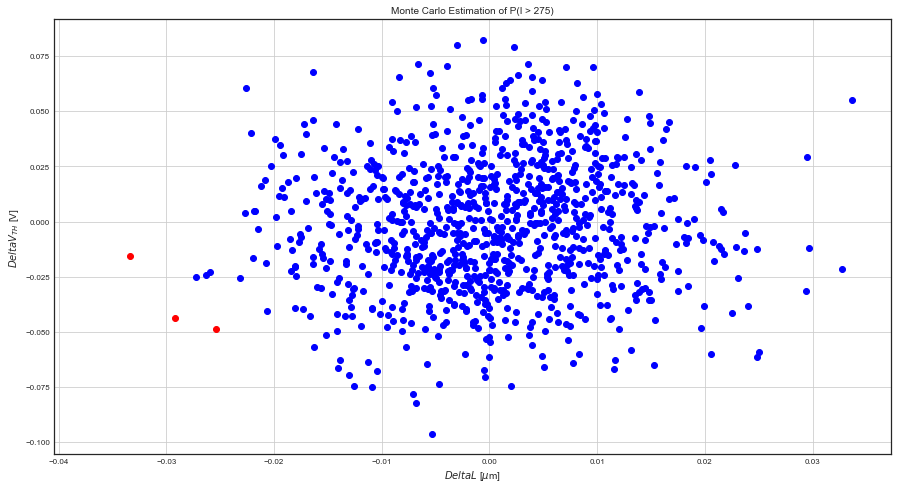

Probability Mean: 0.00300
Probability Std: 0.00000


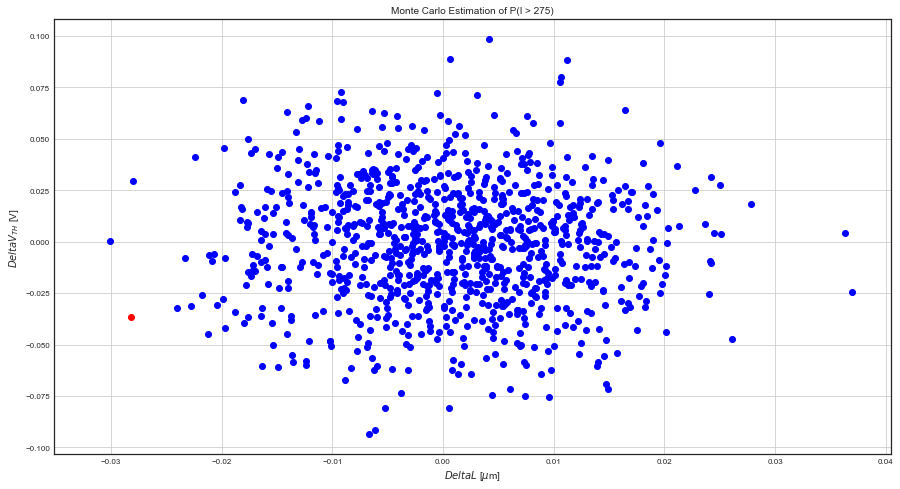

Probability Mean: 0.00200
Probability Std: 0.00100


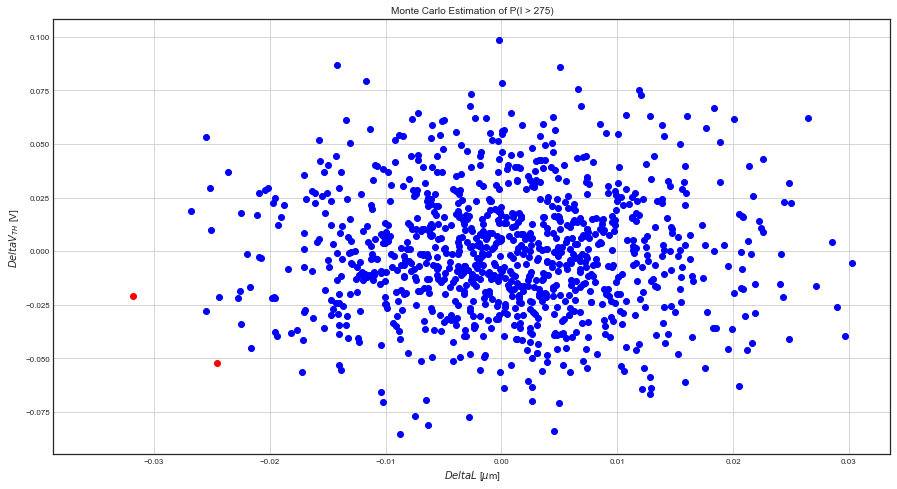

Probability Mean: 0.00200
Probability Std: 0.00082


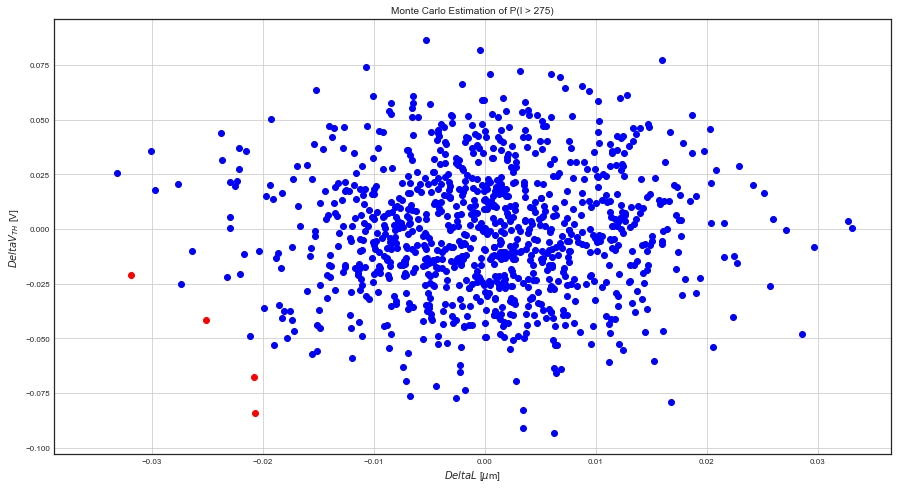

Probability Mean: 0.00250
Probability Std: 0.00112


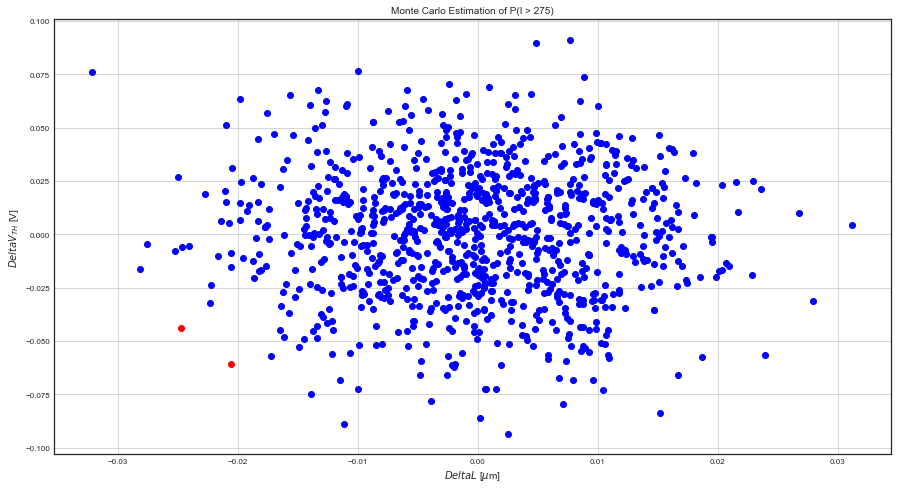

Probability Mean: 0.00240
Probability Std: 0.00102


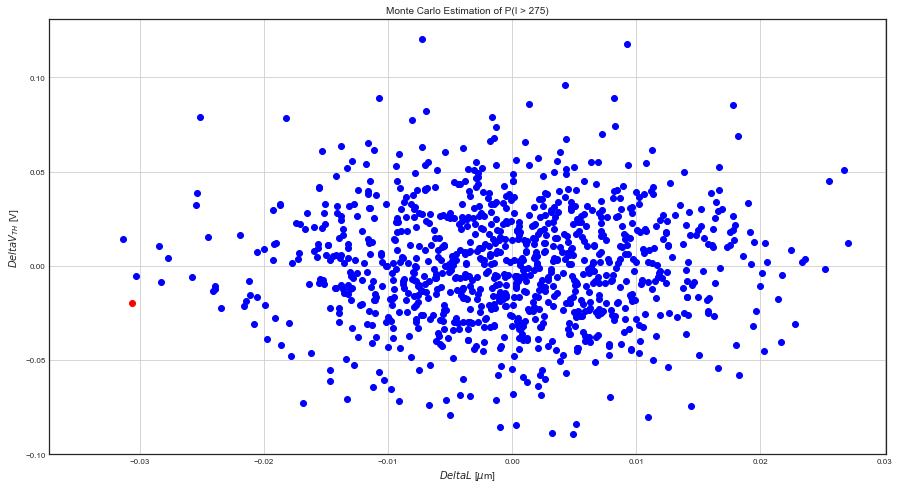

Probability Mean: 0.00217
Probability Std: 0.00107


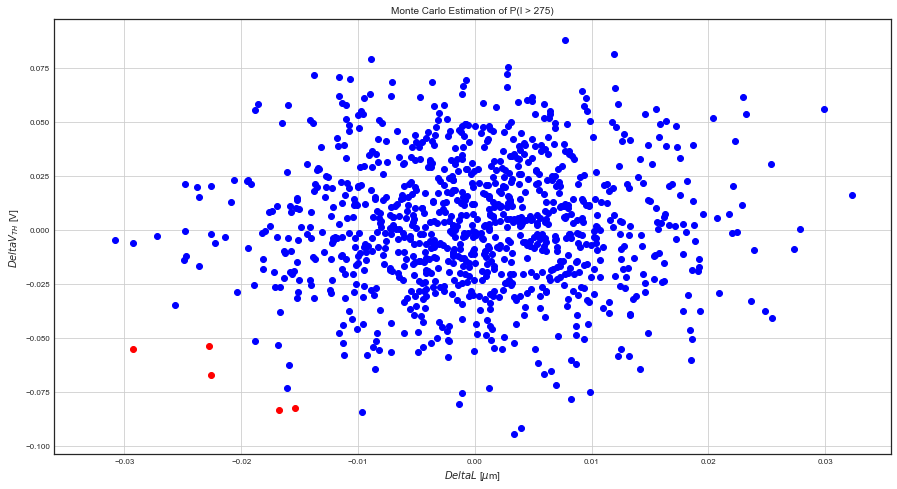

Probability Mean: 0.00257
Probability Std: 0.00140


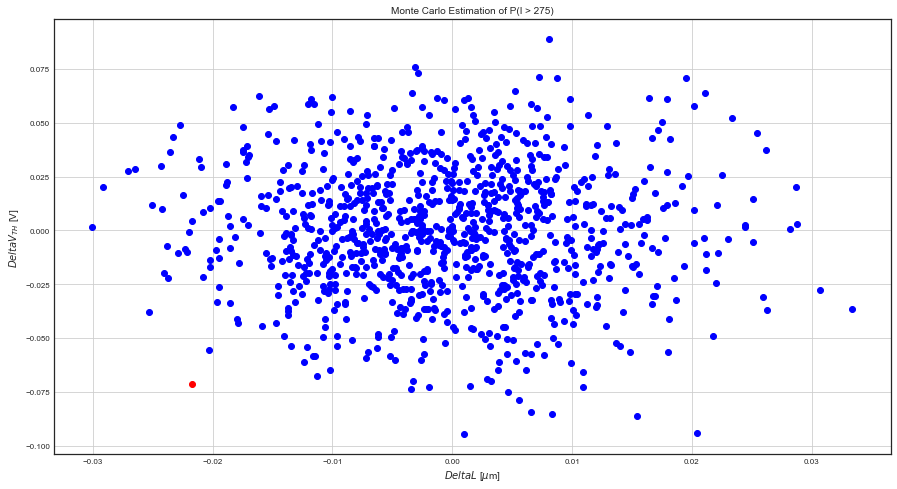

Probability Mean: 0.00238
Probability Std: 0.00141


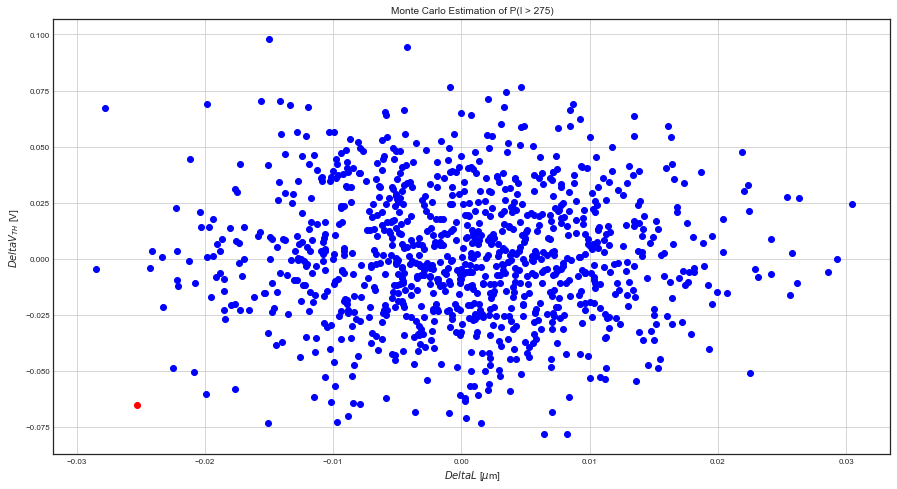

Probability Mean: 0.00222
Probability Std: 0.00140


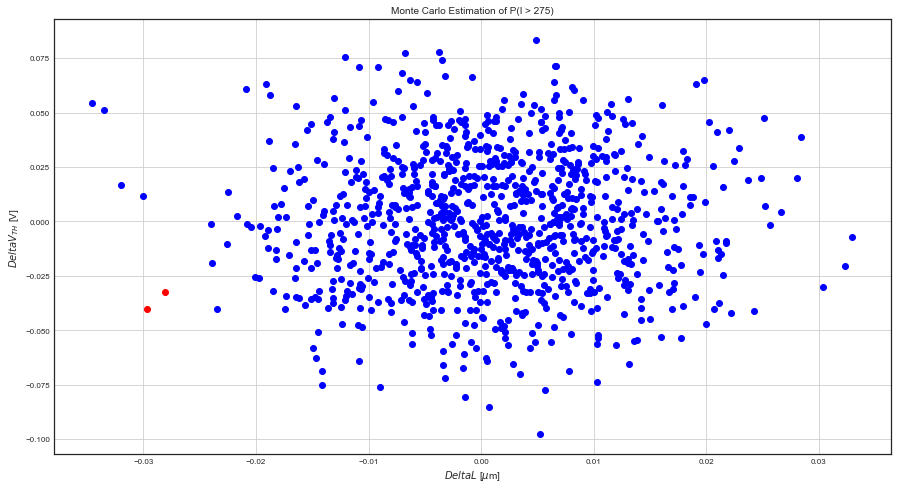

Probability Mean: 0.00220
Probability Std: 0.00133


[0.003, 0.001, 0.002, 0.004, 0.002, 0.001, 0.005, 0.001, 0.001, 0.002]

In [51]:
monte_carlo_prob(10,1000,plot=True)

In [52]:
def MC_histogram(num_samples, plot=True):
    num_samples=int(num_samples)
    mu_1, sigma_1=0, 0.01
    mu_2, sigma_2=0, 0.03
    
    length=np.random.normal(mu_1,sigma_1,num_samples) # L
    voltage=np.random.normal(mu_2,sigma_2,num_samples) # V
    
    num=50*np.square(0.6-voltage)
        
    dnum=0.1+length
        
    I=num/dnum # 위의 문제
    
    
    if plot:
        """
        n : 히스토그램의 저장소의 값
        bin : the edges of the bins
        patches :
        
        """
        n, bins, patches=plt.hist(I, 50, normed=1, facecolor='green', alpha=0.75)
  
        plt.ylabel('Number of Samples')
        plt.xlabel(r'$I_{DS}$ [$\mu$A]')
        plt.title("Monte Carlo Estimation of P(I > 275)")
        plt.grid(True)
        #plt.savefig(plot_dir + 'mc_histogram_{}.pdf'.format(num_samples), format='pdf', dpi=300)
        plt.show()

C:\Users\ryu07\Anaconda3\envs\lab\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


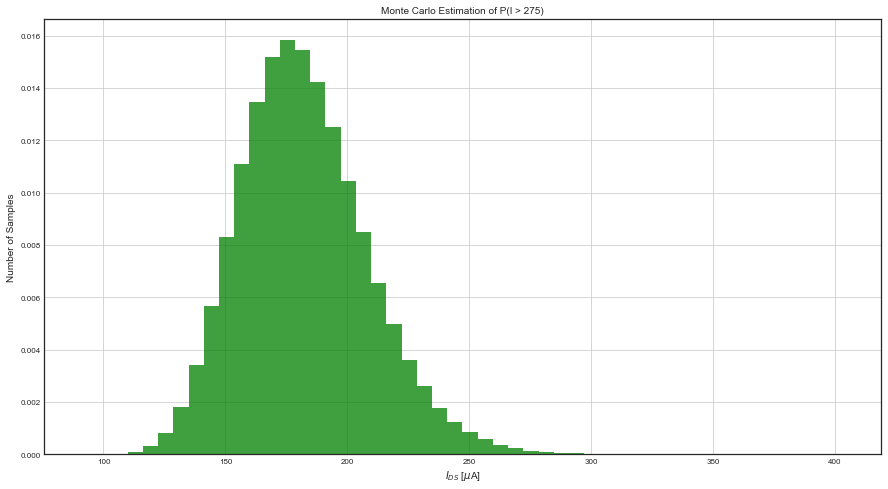

In [53]:
MC_histogram(1e6)

In [54]:
num_samples = [1e3, 1e4, 1e5, 1e6]
num_repetitions=25

total_probs=[]

for i, num_sample in enumerate(num_samples):
    print("lter {}/{}".format(i+1, len((num_samples))))
    probs=monte_carlo_prob(num_repetitions,num_sample, verbose=False)
    total_probs.append(probs)
    


lter 1/4
lter 2/4
lter 3/4
lter 4/4


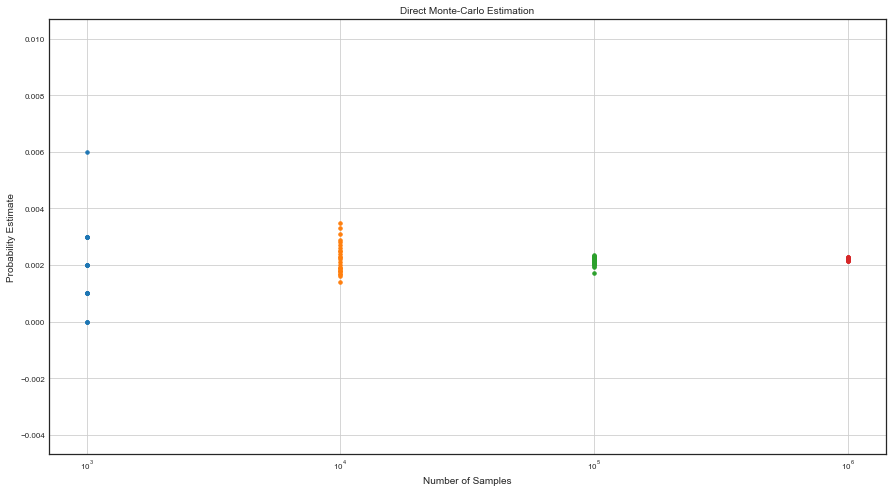

In [58]:
y_axis = np.asarray(total_probs)
x_axis = np.asarray(num_samples)
for x, y in zip(x_axis, y_axis):
    plt.scatter([x] * len(y), y, s=12)

plt.xscale('log')
plt.title("Direct Monte-Carlo Estimation")
plt.ylabel("Probability Estimate")
plt.xlabel('Number of Samples')
plt.grid(True)
plt.show()

## Importance Sampling

With importance sampling, we try to reduce the variance of our Monte-Carlo integral estimation by choosing a better distribution from which to simulate our random variables. It involves multiplying the integrand by 1 (usually dressed up in a “tricky fashion”) to yield an expectation of a quantity that varies less than the original integrand over the region of integration. Concretely,

$$\mathbb{E}_{p(x)} \big[\ f(x) \big] = \int f(x)\ p(x)\ dx = \int f(x)\ p(x)\ \frac{q(x)}{q(x)}\ dx = \int \frac{p(x)}{q(x)}\cdot f(x)\ q(x)\ dx = \mathbb{E}_{q(x)}  \big[\ f(x)\cdot \frac{p(x)}{q(x)} \big]$$

Thus, the MC estimation of the expectation becomes:

$$\mathbb{E}_{q(x)}  \big[\ f(x)\cdot \frac{p(x)}{q(x)} \big] \approx \frac{1}{N} \sum_{n=1}^{N} w_n \cdot f(x_n)$$

where $w_n = \dfrac{p(x_n)}{q(x_n)}$

In our current example above, we can alter the mean and/or standard deviation of $\Delta L$ and $\Delta V_{TH}$ in the hopes that more of our sampling points will fall in the failure region (red area). For example, let us define 2 new distributions with altered $\sigma^2$.

* $\Delta \hat{L} \sim \ N(0, 0.02^2)$
* $\Delta \hat{V}_{TH} \sim \ N(0, 0.06^2)$

In [69]:
def importance_sampling(num_simulations, num_samples, verbose=True, plot=False):
    
    if verbose:
        print("===================================================")
        print("{} Importance Sampling Simulations of size {}".format(num_simulations, num_samples))
        print("===================================================\n")
    
    num_simulations = int(num_simulations)
    num_samples = int(num_samples)
    
    probas = []
    for i in range(num_simulations):
        mu_1, sigma_1 = 0, 0.01
        mu_2, sigma_2 = 0, 0.03
        mu_1_n, sigma_1_n = 0, 0.02
        mu_2_n, sigma_2_n = 0, 0.06
        
        # setup pdfs
        old_pdf_1 = norm(mu_1, sigma_1)
        new_pdf_1 = norm(mu_1_n, sigma_1_n)
        old_pdf_2 = norm(mu_2, sigma_2)
        new_pdf_2 = norm(mu_2_n, sigma_2_n)

        length = np.random.normal(mu_1_n, sigma_1_n, num_samples)
        voltage = np.random.normal(mu_2_n, sigma_2_n, num_samples)
        
        # calculate current
        num = 50 * np.square((0.6 - voltage))
        denum = 0.1 + length
        I = num / denum
        
        # calculate f
        true_condition = np.where(I >= 275)

        # calculate weight
        num = old_pdf_1.pdf(length) * old_pdf_2.pdf(voltage)
        denum = new_pdf_1.pdf(length) * new_pdf_2.pdf(voltage)
        weights = num / denum

        # select weights for nonzero f
        weights = weights[true_condition]

        # compute unbiased proba
        proba = np.sum(weights) / num_samples
        probas.append(proba)
        
        false_condition = np.where(I < 275)
        if plot:
            if i == num_simulations -1:
                plt.scatter(length[true_condition], voltage[true_condition], color='r')
                plt.scatter(length[false_condition], voltage[false_condition], color='b')
                plt.xlabel(r'$\Delta L$ [$\mu$m]')
                plt.ylabel(r'$\Delta V_{TH}$ [V]')
                plt.title("Monte Carlo Estimation of P(I > 275)")
                plt.grid(True)
                plt.savefig(plot_dir + 'imp_sampling_{}.pdf'.format(num_samples), format='pdf', dpi=300)
                plt.show()
    
    
    mean_proba = np.mean(probas)
    std_proba = np.std(probas)
    
    if verbose:
        print("Probability Mean: {}".format(mean_proba))
        print("Probability Std: {}".format(std_proba))
    
    return probas

In [62]:
probas = importance_sampling(10, 10000, plot=False)

10 Importance Sampling Simulations of size 10000

Probability Mean: 0.05498814258784042
Probability Std: 0.002721573827815849


In [66]:
def IS_histogram(num_samples, plot=True):
    
    num_samples = int(num_samples)

    mu_1_n, sigma_1_n = 0, 0.02
    mu_2_n, sigma_2_n = 0, 0.06

    length = np.random.normal(mu_1_n, sigma_1_n, num_samples)
    voltage = np.random.normal(mu_2_n, sigma_2_n, num_samples)

    # calculate biased current
    num = 50 * np.square((0.6 - voltage))
    denum = 0.1 + length
    I = num / denum

    if plot:
        n, bins, patches = plt.hist(I, 50, normed=1, facecolor='green', alpha=0.75)
        plt.ylabel('Number of Samples')
        plt.xlabel(r'$I_{DS}$ [$\mu$A]')
        plt.title("Importance Sampling of P(I > 275)")
        plt.grid(True)
        plt.show()

C:\Users\ryu07\Anaconda3\envs\lab\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


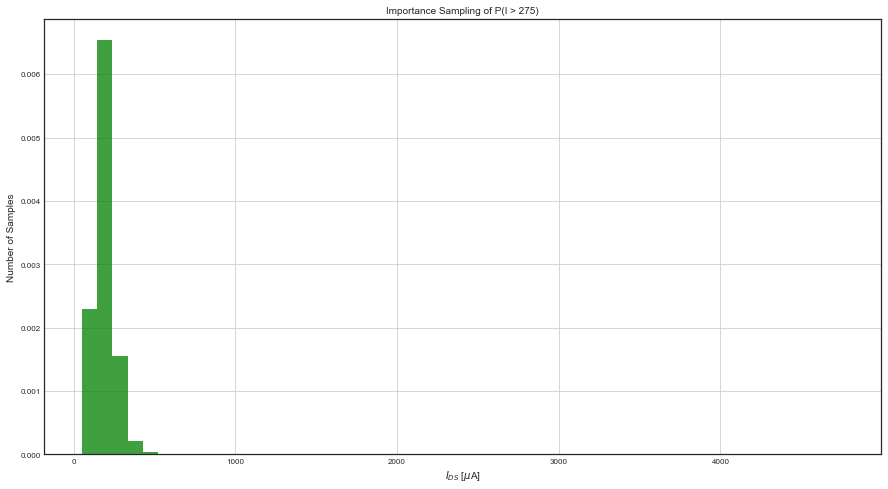

In [67]:
IS_histogram(1e5)

In [70]:
num_samples = [1e3, 1e4, 1e5, 1e6]
num_repetitions = 25

total_probas = []
for i, num_sample in enumerate(num_samples):
    print("Iter {}/{}".format(i+1, len(num_samples)))
    probas = importance_sampling(num_repetitions, num_sample, verbose=False)
    total_probas.append(probas)

Iter 1/4
Iter 2/4
Iter 3/4
Iter 4/4


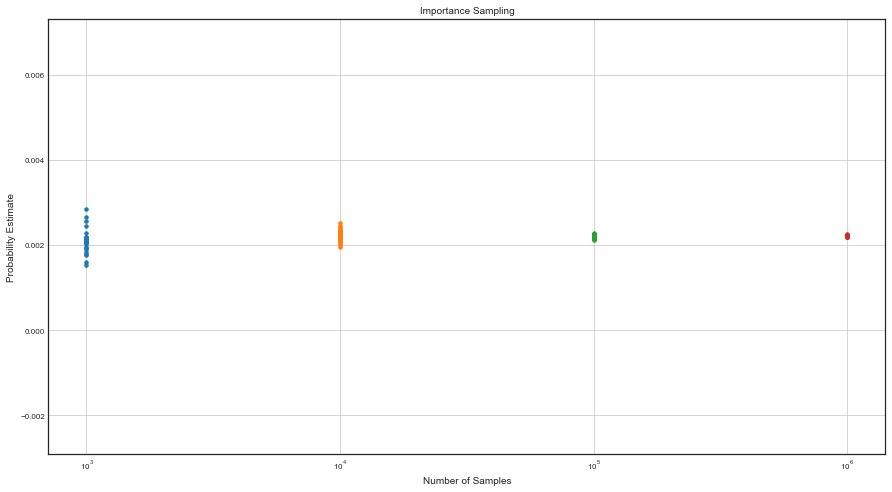

In [72]:
y_axis = np.asarray(total_probas)
x_axis = np.asarray(num_samples)

for x, y in zip(x_axis, y_axis):
    plt.scatter([x] * len(y), y, s=12)
    
plt.xscale('log')
plt.title("Importance Sampling")
plt.ylabel("Probability Estimate")
plt.xlabel('Number of Samples')
plt.grid(True)
plt.show()